![example](images/director_shot.jpeg)

# **Movie and Box Office Analysis**

## **Author:** Noah Meakins
***

## **Overview**

This project aims to analyze factors influencing movie success by examining various datasets related to movie revenues, budgets, ratings, and other attributes. To accomplish this I performed an exploratory data analysis (EDA) to understand the data better and visualized the relationships between different variables. Based on my findings, I will provide actionable insights for the movie studio.

For a deeper and more technical look into the analysis and how it was accomplished, please navigate to the folder listed `code` that is attached to this project. 

### **Business Problem**
The primary goal of this project is to identify key factors of box office success to help the movie studio make informed production and marketing decisions.

**Questions That Were Considered:**
- What are the key factors that contribute to a movie's success?
- How can the studio optimize its budget allocation for maximum returns?
- What genre trends should the studio focus on to attract a larger audience?

### **Data Understanding**

Multiple datasets were provided and utilized for this analysis, including movie gross revenue, ratings, and budget information. The key variables include:

- `domestic_gross` - domestic gross revenue of listed movies titles
- `foreign_gross` - foreign gross revenue of listed movie titles
- `production_budget` - budget spent on the production of listed movie titles
- `year` - year of release
- `runtime_minutes` - minutes of runtime for each movie title
- `genres` - genres for each movie title listed
- `average_rating` - average rating for all listed movie titles
- `num_votes` - number of votes per movie title
- `popularity` - recorded popularity of each movie title
- `vote_average` - average vote count for each movie title
- `vote_count` - additional vote data for each movie title
- `worldwide_gross` - worldwide gross revenue for each movie title

#### **Data Sources**

- bom_movie_gross: This is data provided from https://www.boxofficemojo.com/
- im.db: This is an SQLite database with data provided from https://www.imdb.com/
- tmdb_movies: This is data provided from https://www.themoviedb.org/
- tn_movie_budgets: This is a dataset from https://www.the-numbers.com/
***

## **Data Preparation**

The data preparation involved several steps to clean, transform, and merge datasets from the provided sources:
1. **Box Office Mojo Data**:
   - Removed non-numeric characters from `foreign_gross` and filled missing values with 0.
   - Filled missing `studio` values with 'Unknown'.
   - Dropped rows with missing `domestic_gross`.
2. **IMDb Data**:
   - Filled missing `runtime_minutes` with the median value.
   - Replaced missing `genres` with 'Unknown'.
   - Ensured all movies had a title by filling missing `original_title` with `primary_title`.
3. **The Numbers Data**:
   - Removed non-numeric characters from `production_budget`, `domestic_gross`, and `worldwide_gross`.
4. **TMDb Data**:
   - Dropped unnecessary index column.
   - Converted `popularity`, `vote_average`, and `vote_count` to numeric types.
   - Converted `release_date` to datetime type.
5. **Column Selection and Renaming**:
   - Kept relevant columns and renamed them for consistency.
   - Replaced zero values in financial columns to avoid issues with log transformation.
   - Applied log transformation to normalize skewed financial data.

All steps that were taken were performed with great consideration to the overall integrity of the analysis. 

The final merged dataset combines cleaned and formatted data from all sources, this consolidated dataset will be used for the analysis.
***

### **Importing Required Packages and Libraries**

In [1]:
# importing standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os
import sys

project_root = os.path.abspath('')
os.chdir(project_root)

code_directory = os.path.join(project_root, 'code')
if code_directory not in sys.path:
    sys.path.append(code_directory)

In [3]:
# importing the visualization script I created
import visualizations as viz

# loading the cleaned dataset
merged_df = pd.read_csv('cleanedData/cleaned_data.csv')

## **Visualizations To Support Recommendations**

### **Correlation Heatmap**

#### **Purpose:**
- This heatmap visualizes the correlation between various numerical features in the dataset. Darker colors indicate stronger correlations. From this, I was able to see any correlations that might help in producing recommendations for the movie studio. 

#### **Key insights:**
- The heatmap reveals strong correlations between variables such as:

    - worldwide_gross and production_budget
    - domestic_gross and foreign_gross
    - runtime_minutes and num_votes 

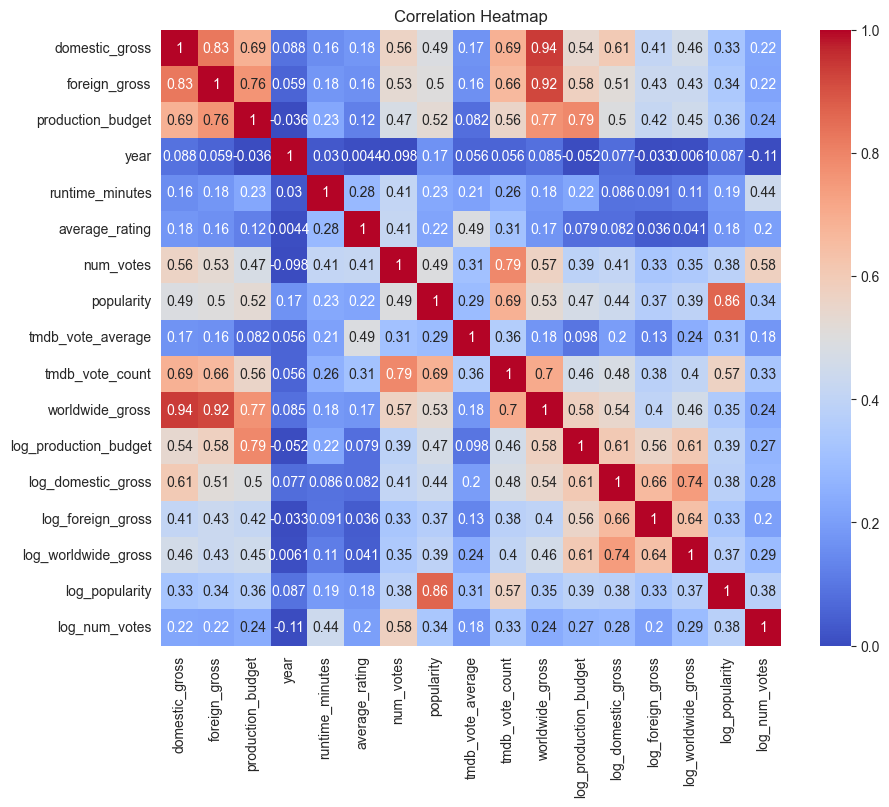

In [4]:
# selecting numerical columns for correlation analysis
numeric_cols = merged_df.select_dtypes(include=['float64', 'int64']).columns

# getting the correlation data
correlation_data = merged_df[numeric_cols].corr()

# using the imported heatmap function
viz.heatmap(
    data=correlation_data, 
    title='Correlation Heatmap', 
    save_path='images/correlation_heatmap.png'
)

### **Scatter Plot of Domestic Gross vs. Foreign Gross**

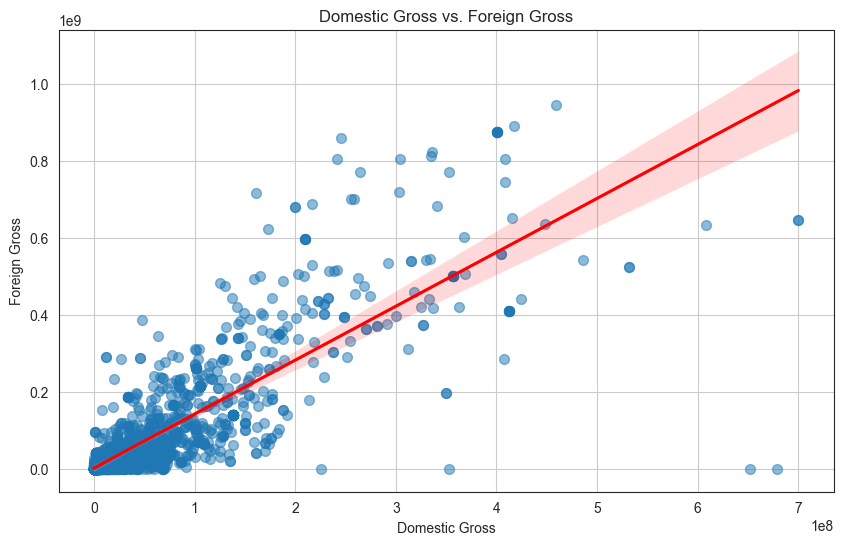

In [5]:
# scatter plot: domestic gross vs. foreign gross
viz.scatter_plot_with_trend_1(
    data=merged_df, 
    x='domestic_gross', 
    y='foreign_gross', 
    title='Domestic Gross vs. Foreign Gross', 
    xlabel='Domestic Gross', 
    ylabel='Foreign Gross', 
    save_path='images/scatter_domestic_foreign_gross.png'
)

### **Scatter Plot of Production Budget vs. Worldwide Gross**

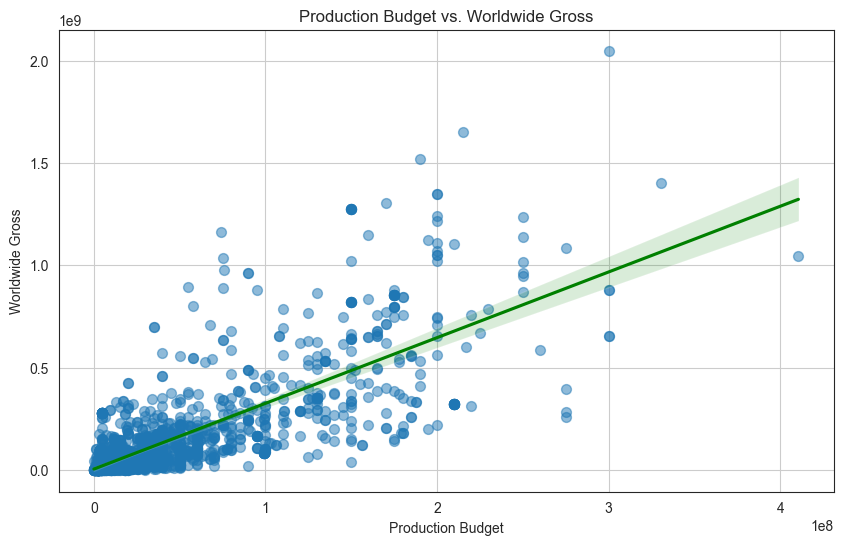

In [6]:
# scatter plot: production budget vs. worldwide gross
viz.scatter_plot_with_trend_2(
    data=merged_df, 
    x='production_budget', 
    y='worldwide_gross', 
    title='Production Budget vs. Worldwide Gross', 
    xlabel='Production Budget', 
    ylabel='Worldwide Gross', 
    save_path='images/scatter_budget_worldwide_gross.png'
)

### **Scatter Plot of Runtime Minutes vs. Number of Votes**

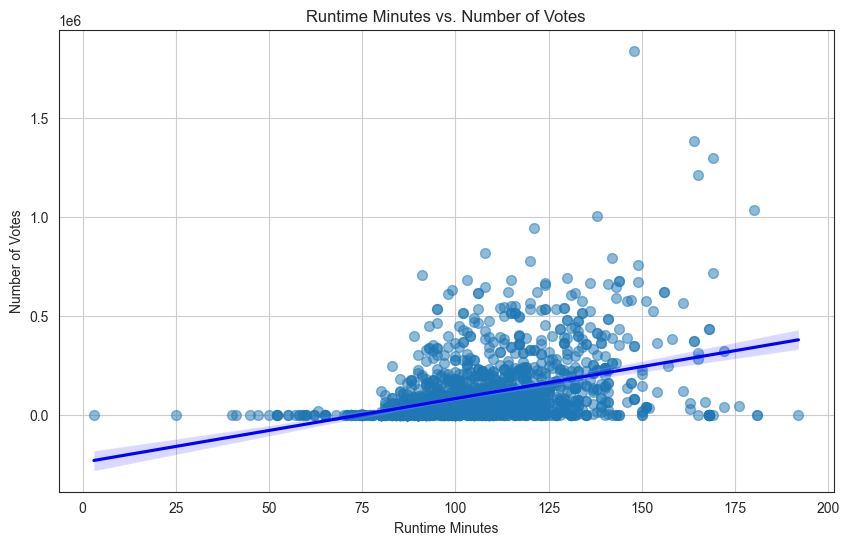

In [7]:
# scatter plot: runtime minutes vs. number of votes
viz.scatter_plot_with_trend_3(
    data=merged_df, 
    x='runtime_minutes', 
    y='num_votes', 
    title='Runtime Minutes vs. Number of Votes', 
    xlabel='Runtime Minutes', 
    ylabel='Number of Votes', 
    save_path='images/scatter_runtime_votes.png'
)

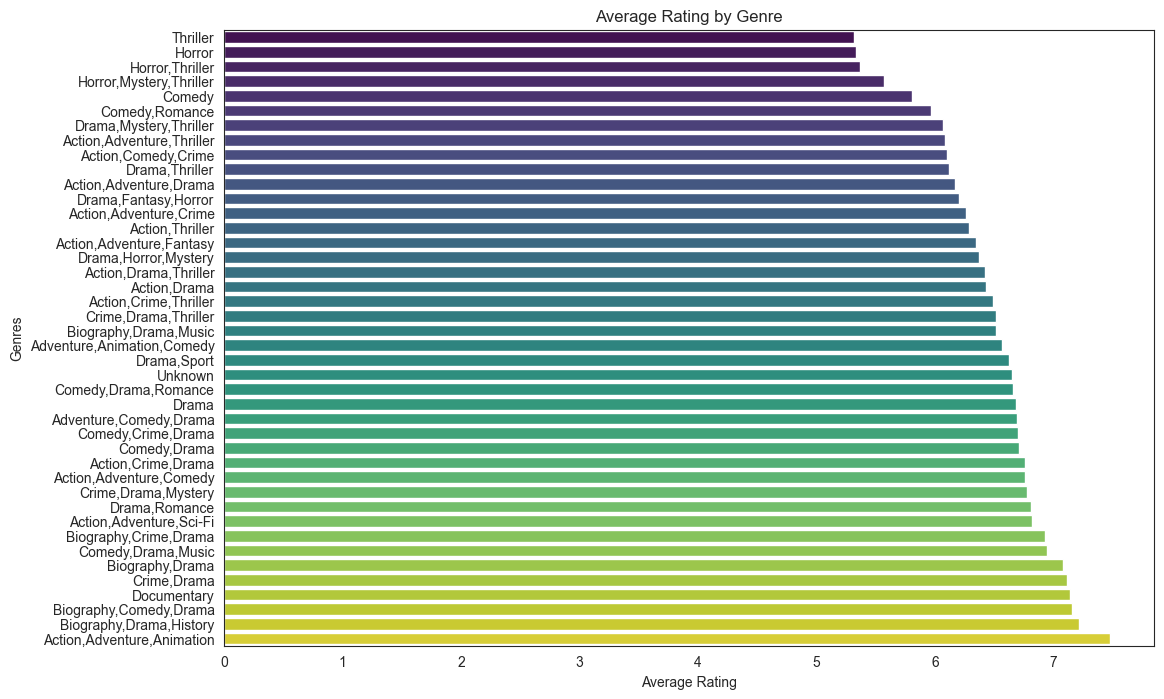

In [8]:
# bar plot: average rating by genre
viz.bar_plot(
    data=merged_df,
    column='genres',
    value='average_rating',
    threshold=10,  # Adjust the threshold as needed
    title='Average Rating by Genre',
    xlabel='Average Rating',
    ylabel='Genres',
    save_path='images/barplot_avg_rating_by_genre.png'
)

## **Evaluation**

My analysis reveals several key factors influencing movie success:
- High production budgets are generally associated with higher revenues.
- Movies that perform well domestically often do well internationally too.
- Certain genres receive higher average ratings, which could influence viewer preference and revenue.

## **Recommendations**

1. **Invest in High Production Budgets**: Given the strong correlation with worldwide gross, investing in higher production budgets could yield better financial returns.
2. **Focus on Popular Genres**: Biography-Drama-History and Action-Adventure-Animation movies tend to receive higher ratings, indicating a potential area for strategic focus.
3. **Target Global Markets**: Since domestic and foreign grosses are highly correlated, a strategy that maximizes domestic performance is likely to succeed internationally as well.

## **Conclusions**
My analysis provides actionable insights for the new movie studio:

1. **Investment Strategy**: Focus on movies with higher production budgets to maximize revenue potential.
2. **Genre Selection**: Prioritize genres like Biography-Drama-History and Action-Adventure-Animation movies that tend to receive higher ratings and audience engagement.
3. **Global Market Strategy**: Develop marketing and distribution strategies that enhance domestic performance, which in turn could boost international revenues when released internationally.